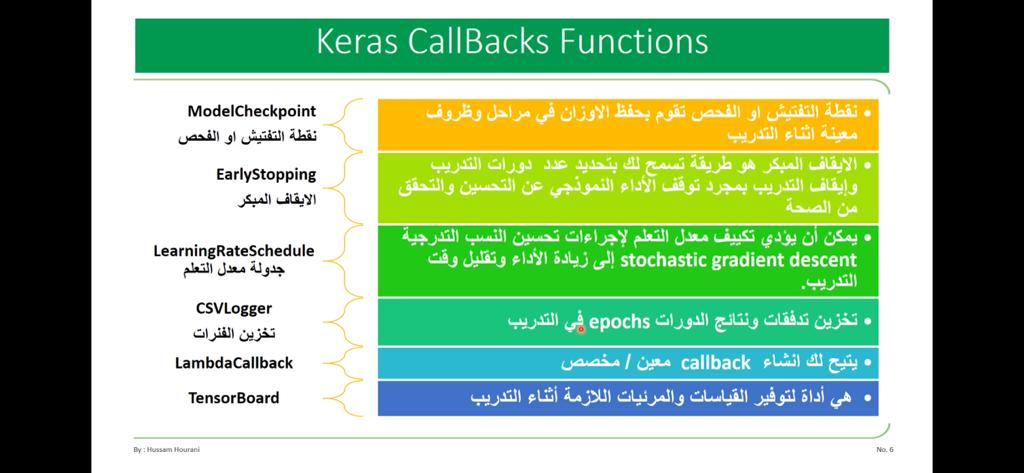

# Examples Source

https://machinelearningmastery.com/check-point-deep-learning-models-keras/
    
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
    
https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/
    
https://machinelearningmastery.com/

# ModelCheckpoint fuction

ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save _weights_only=False, mode='auto', period=1)

**Arguments:**

• filepath: string, path to save the model file.

• monitor: quantity to monitor.

• verbose: verbosity mode, O or 1.

• save_best_only: if save_best_only=True, the latest best model according to the quantity monitored will not be overwritten.

• save_weights_only: if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved model.save(filepath)).

• mode: one of {auto, min, max}. If save best only=True, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val _acc, this should be max, for val _loss this should be min, etc.
In auto mode, the direction is automatically inferred from the name of the monitored quantity.

• period: Interval (number of epochs) between checkpoints.



- A good use of checkpointing is to output the model weights each time an improvement is observed during training.
- Checkpointing is setup to save the network weights only when there is an improvement in classification accuracy on the validation dataset (monitor='val accuracy' and mode='max'). The weights are stored in a file that includes the score in the filename (weights-improvement-{val_accuracy=.2f}.hdf5).


# Checkpoint Neural Network Model Improvements

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as plt
import numpy
# load pima indians dataset
dataset = numpy. loadt×t ("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset [:,0:8]
Y = dataset [:, 8]
# create model
model = Sequential()
model. add(Dense (12, input_dim=8, activation='relu')) 
model.add(Dense (8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-(epoch:02d]-{val_accuracy:.2f).hdf5"
checkpoint = Modelcheckpoint (filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

# Checkpoint Best Neural Network Model Only

In [ ]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as plt 
import numpy
# load pima indians dataset
dataset = numpy. loadtxt ("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset [:,8]
# create model
model = Sequential()
model.add(Dense (12, input_dim=8, activation='relu')) 
model.add(Dense (8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = Mode1Checkpoint (filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max")
callbacks_list = [checkpoint]
# Fit the model
model. fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

# Loading a Check-Pointed Neural Network Model

In [ ]:
# How to load and use weights from a checkpoint
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as plt 
import numpy
# create model
model = Sequential ()
model. add (Dense (12, input_dim=8, activation='relu')) model. add (Dense (8, activation='relu')) model.add(Dense(1, activation='sigmoid'))
# Load weights
model. load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
Output
print("Created model and loaded weights from file")
# Load pima indians dataset
dataset = numpy. loadtxt ("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset [:, 0:8]
Y = dataset [:,8]
# estimate accuracy on whole dataset using loaded weights
scores = model. evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics names [1], scores [1]*100))

# EarlyStopping function

EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)


**Arguments:**
• monitor: quantity to be monitored.
    
• min delta: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

• patience: number of epochs that produced the monitored quantity with no improvement after which training will be stopped.
verbose: verbosity mode.
    
• mode: one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the

• name of the monitored quantity.

• baseline: Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline.

• restore best weights: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.


In [ ]:
# mlp overfit on the moons dataset
from sklearn. datasets import make_moons 
from keras.layers import Dense 
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons (_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential ()
model.add(Dense (500, input_dim=2, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model. fit (train, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)
# evaluate the model
_, train_acc = model.evaluate (trainX, trainy, verbose=1)
_, test_acc = model.evaluate (testX, testy, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot (history.history['loss'], label='train') 
pyplot.plot (history.history['val_loss'], label='test') 
pyplot. legend () 
pyplot.show()

'''Running the example reports the model performance on the train and test datasets.
We can see that the model has better performance on the training dataset than the test dataset, one possible sign of'''

In [ ]:
from sklearn. datasets import make_moons 
from keras.models import Sequential 
from keras.layers import Dense
from keras.callbacks import EarlyStopping 
from matplotlib import pyplot
X, y = make_moons (_samples=100, noise=0.2, random_state=1)
n_train = 30
trainx, test = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
model = Sequential ()
model.add(Dense (500, input_dim=2, activation='relu'))
model.add (Dense (1, activation='sigmoid')) 
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping (monitor='val_loss', mode='min', verbose=1)
history = model.fit (train, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate (train, trainy, verbose=0)
_, test_acc = model. evaluate (testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot (history.history['loss'], label='train') 
pyplot.plot(history.history['val_ loss'], label='test') 
pyplot. legend() 
pyplot.show()

#We can also see that the callback stopped training at epoch 200. This is too early as we would expect an early stop to be around epoch 800.

In [ ]:
from sklearn. datasets import make_moons 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
X, y = make_moons (_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]
model = Sequential ()
model.add(Dense (500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile (loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
# patient early stopping
es = EarlyStopping (monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model. fit(trainx, trainy, validation_data-(test, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the mode
_, train_acc = model.evaluate (trainX, trainy, verbose=0)
_, test_acc = model. evaluate (testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot (history.history['loss'], label='train') 
pyplot.plot (history.history['val_loss'], label='test') 
pyplot. legend () 
pyplot. show()


In [ ]:
from sklearn.datasets import make_moons 
from keras.models import Sequential
from keras.lavers import Dense
from keras.callbacks import EarlyStopping 
from keras.callbacks import ModelCheckpoint 
from matplotlib import pyplot
from keras.models import load_model
X, y = make_moons (n_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
model = Sequential ()
model.add(Dense (500, input_dim=2, activation='relu')) 
model.add(Dense (1, activation='sigmoid')) 
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping (monitor='val_loss', mode= 'min', verbose=1, patience=200)
mc = ModelChecRpoint ('best_model.h5',monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit (train, trainy, validation_data-(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# Load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
- train_acc = saved_model.evaluate (trainX, trainy, verbose=0)
test_acc = saved_model.evaluate (testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# LearningRateSchedule function

LearningRateScheduler(schedule, verbose=0)

**Arguments:**
• schedule: a function that takes an epoch index as input (integer, indexed from 0) and current learning rate and returns a new learning rate as output (float).
• verbose: int. 0: quiet, 1: update messages.


# LearningRateScheduler Case Study

In [ ]:
from pandas import read_csv 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.preprocessing import LabelEncoder
# Load dataset
dataframe = read_csv("Lonosphere.csv", header=None) 
# dada link: http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset [:, 0:34].astype(float)
Y = dataset [:, 34]
# encode class values as integers
encoder = LabelEncoder ()
encoder.fit (Y)
Y = encoder.transform(Y)
# create model
model = Sequential ()
model. add (Dense (34, input_dim=34, activation='relu')) 
model.add (Dense (1, activation='sigmoid'))
sgd = SGD()
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, verbose=2)

# LearningRateScheduler Case Study

LearningRate = LearningRate * 1/(1 + decay * epoch)
When the decay argument is zero (the default), this has no effect on the learning rate.
LearningRate = 0.1 * 1/(1 + 0.0 * 1)
LearningRate = 0.1
You can create a nice default schedule by setting the decay value as follows:
Decay = LearningRate / Epochs
Decay = 0.1 / 100
Decay = 0.001

In [ ]:
from pandas 
import read_csv 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.preprocessing import LabelEncoder
dataframe = read csv ("ionosphere.csv", header=None)
dataset = dataframe.values
X = dataset [:, 0:34].astype(float)
Y = dataset [:, 34]
encoder = LabelEncoder()
encoder.fit (Y)
Y = encoder. transform(Y)
model = Sequential ()
model.add (Dense (34, input_dim=34, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(Ir=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model. compile (loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) 
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

# Drop-Based Learning Rate Schedule

Another popular learning rate schedule used with deep learning models is to systematically drop the learning rate at specific times during training.


LearningRate = InitialLearningRate * DropRate^floor(Epoch / EpochDrop)

In [ ]:
from pandas import read_Csv 
import math
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.preprocessing import LabelEncoder 
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay (epoch):
    initial_Irate = 0.1
    drop = 0.5
    epochs drop = 10.0
    Irate = initial_Irate * math.pow (drop, math. floor ((I+epoch)/epochs_drop))
    return Irate
dataframe = read_csv("ionosphere. csv", header=None)
dataset = dataframe.values
X = dataset [:, 0:34].astype (float)
Y = dataset[:, 34]
encoder = LabelEncoder ()
encoder.fit(Y)
Y = encoder. transform (Y)
model = Sequential()
model. add(Dense (34, input_dim=34, activation='relu')) 
model.add (Dense(1, activation='sigmoid'))
sgd = SGD(1r=0.0, momentum=0.9)
model.compile (loss='binary_crossentropy', optimizerasgd, metrics=['accuracy'])
frate = LearningRateScheduler(step_decay)
model.fit(X,Y, validation split=0.33, epochs=50, batch size=28, callbacks=[Irate], verbose=2)

# CSVLogger

CSVLogger(filename, separator=',', append=False)

**Arguments:**
• filename: filename of the csv file, e.g. 'run/log.csv'.
    
• separator: string used to separate elements in the csv file.
    
• append: True: append if file exists (useful for continuing training). False: overwrite existing file,

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import CSVLogger 
import matplotlib.pyplot as plt
import numpy
# Load pima indians dataset
dataset = numpy. loadtxt ("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:, 8]
# create model
model = Sequential ()
model.add (Dense (12, input_dim=8, activation='relu'))
model.add (Dense (8, activation='relu')) 
model. add(Dense(1, activation='sigmoid'))
# Compile model
model.compile (loss='binary _crossentropy', optimizer='adam', metrics=['accuracy'])
call = CSVLogger ('mytrain.csv', separator=',', append=False)
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks= [call], verbose=0)


# LambdaCallback Function

LambdaCallback(on_epoch_begin=None, on_epoch_end=None,on_batch_begin=None, on_batch_end=None, on_train_begin=None, 
               on_train_end=None)


**Arguments:**
• on_epoch_begin: called at the beginning of every epoch.
• on epoch end: called at the end of every epoch.
• on _batch _begin: called at the beginning of every batch.
• on_batch_end: called at the end of every batch.
• on train begin: called at the beginning of model training.
• on train end: called at the end of model training.
    
    
• on_epoch_begin and on_epoch_end expect two positional arguments: epoch, logs
• on_batch_begin and on_batch_end expect two positional arguments: batch, logs
• on_train_begin and on_train_end expect one positional argument: logs

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import LambdaCallback 
import matplotlib.pyplot as plt 
import numpy
# Load pima indians dataset
dataset = numpy. loadt×t ("pima-indians-diabetes.csv", delimiter=",") 
# split into input (X) and° output (Y) variables
X = dataset [:,0:8]
Y = dataset [:,8]
# create model
model = Sequential ()
model. add (Dense (12, input_dim=8, activation='relu')) 
model. add (Dense (8, activation='relu')) 
model.add (Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
call1 = LambdaCallback(on_epoch_end= lambda epochs, logs:
                       model.save_weights ('MyLambdaTraining.hdf5') if logs ['val_accuracy'] > 0.60 else None)
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks= [call1], verbose=1)

# TensorBoard Function

TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph= True, write_grads=False, write_images=False,  embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddinas data=None, update freq....)


In machine learning, to improve something you often need to be able to measure it. TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

This quickstart will show how to quickly get started with TensorBoard. The remaining guides in this website provide more details on specific capabilities, many of which are not included here.

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import TensorBoard 
import matplotlib.pyplot as plt 
import numpy
# load pima indians dataset
dataset = numpy.loadtxt ("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset [:, 0:8]
Y = dataset [:,8]
# create model
model = Sequential ()
model.add(Dense (12, input_dim=8, activation='relu')) 
model.add(Dense (8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile (loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy' ])
call1 = TensorBoard(log_dir='blogs',histogram_freq=1,write_graph=True, write_images=True)
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=[call1], verbose=1)

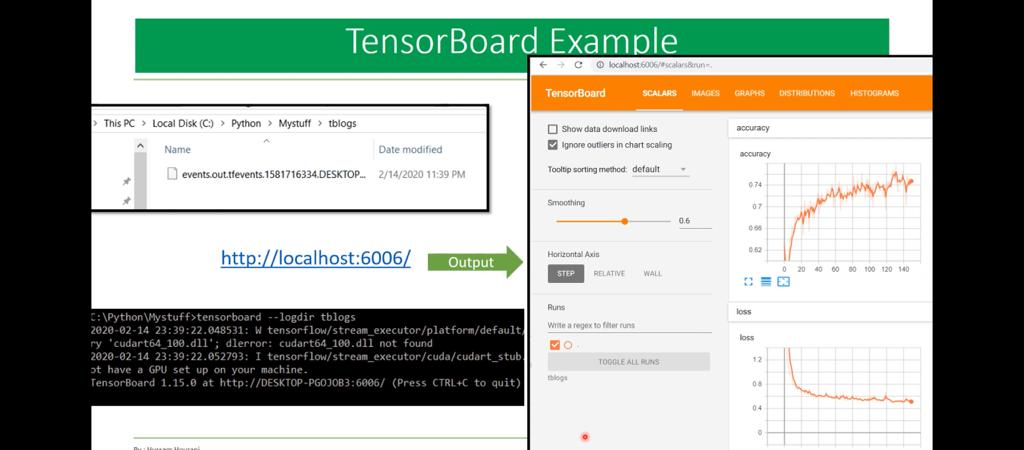

# Refrences

https://keras.io/callbacks/

https://raw.githubusercontent.com/ibrownlee/Datasets/master/pima-indians-diabetes.data.csv

https://machinelearningmastery.com/check-point-deep-learning-models-keras/
    
https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

https://machinelearningmastery.com/check-point-deep-learning-models-keras/    

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

https://www.tensorflow.org/tensorboard/get_started